In [31]:
from scipy.sparse import spdiags
import numpy as np
import matplotlib.pyplot as plt

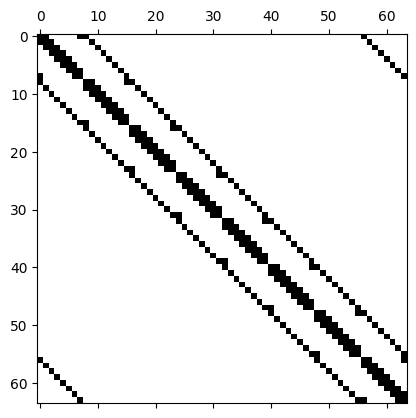

In [32]:
n = 8
N = n * n
dx = (10 - (-10))/n

e0 = np.zeros((N,1))
e1 = np.ones((N,1))
e2 = np.copy(e1)
e4 = np.copy(e0)

for i in range(1,n+1):
    e2[n*i-1] = 0
    e4[n*i-1] = 1

e3 = np.zeros_like(e2)
e3[1:N] = e2[0:N-1]
e3[0] = e2[N-1]

e5 = np.zeros_like(e4)
e5[1:N] = e4[0:N-1]
e5[0] = e4[N-1]

diagonals = [e1.flatten(), e1.flatten(), e5.flatten(),
e2.flatten(), -4 * e1.flatten(), e3.flatten(), e4.flatten(), e1.flatten(), e1.flatten()]

offsets = [-(N-n), -n, -n+1, -1, 0, 1, n-1, n, (N-n)]
matA = (spdiags(diagonals, offsets, N, N)/dx**2).toarray()

plt.spy(matA)
A1 = matA

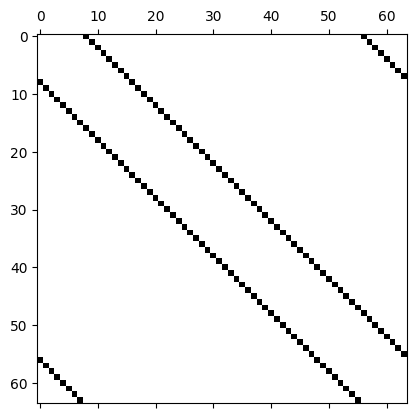

In [33]:
eb = np.ones((N,1))

diag = [eb.flatten(),-eb.flatten(),eb.flatten(),-eb.flatten()]
offsets = [-(N-n),-n,n,N-n]
B = (spdiags(diag, offsets, N, N)/(2*dx)).toarray()
plt.spy(B)
A2 = B

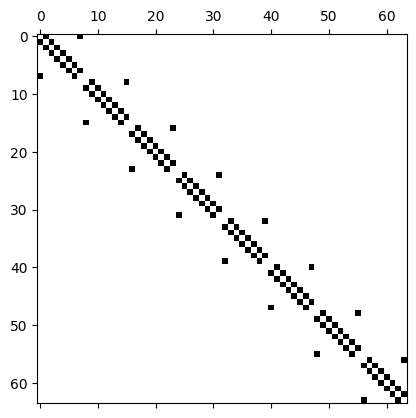

In [34]:
ec = np.ones((N,1))


ec2 = np.zeros((N,1))
for i in range(1,n+1):
    ec2[i*n-1] = 1
    ec[i*n-1] = 0



ec1 = np.zeros_like(ec)
ec1[1:N] = ec[0:N-1]
ec1[0] = ec[n-1]

ec3 = np.zeros_like(ec2)
ec3[1:N] = ec2[0:N-1]
ec3[0] = ec2[n-1]

diag = [ec3.flatten(),-ec.flatten(),ec1.flatten(),-ec2.flatten()]
offsets = [-n+1,-1,1,n-1]
C = (spdiags(diag, offsets, N, N)/(2*dx)).toarray()
plt.spy(C)

A3 = C